In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import denseRSRG as df
import exactdiago as ex

## RSRG

### $\lambda = 0$

I study the case when $\lambda = 0$, computing the ground state energy and looking if they follow the expected behaviour of $E_g = -(N-1)$. A discrepacy between the theoretical and computed value can be thought as a measure of error.

In [ ]:
N = 2   # Initial number of sites
l = 0   # lambda value of the trasverse field
threshold = 1e-3    # Threshold value for the RSRG algorithm
max_iter = 10       # Number of iterations of the algorithm; each completed iteration doubles the number of sites N -> 2N and cosequently 
                    # the dimension of the Hamiltonian H_2N (before the truncation) 2**N -> 2**2N
d_eff = 2**N    # Number of eigevalues to retrieve in order to build the projector

# I run the RSRG algorithm
normgs_eigval_dict, eigvec, deltas_dim, actual_dim = df.real_space_rg(N, l, threshold, d_eff, max_iter)

# normgs_eigval_dict: is the dictionary of the normalized eigenvalues for each dimension in the iteration
# eigvec: is the first eigenvector of the last hamiltonian
# deltas_dim: is the list of deltas for each dimension in the iteration
# actual_dim: is the final dimension reached


# I compute the Non-Normalized GS energies by multipling again for the current value of N
gs_eigval = {N: N * en for N, en in normgs_eigval_dict.items()}

# I compute the expected behaviour for the Non-Normalized GS energies, using the above-mentioned formula
theoretical_eigval = {N: -(N-1) for N in normgs_eigval_dict.keys()}

# I compute the relative error between the computed and expected values of the Non-Normalized GS energies
error_eigval = {N: np.abs((gs_eigval[N] - theoretical_eigval[N])/theoretical_eigval[N]) for N in normgs_eigval_dict.keys()}

Convergence achieved at iteration 9: ε = -0.9990234375000011 

Converged reached for a system with N = 1024 sites, with precision: delta = 0.0009765624999986677


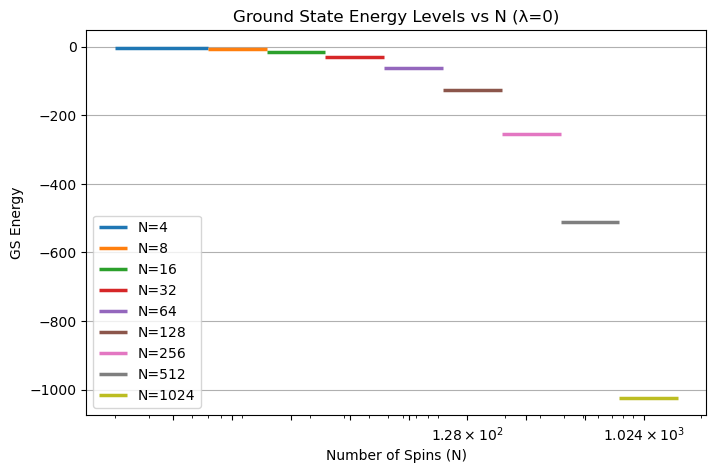

In [13]:
plt.figure(figsize=(8, 5))

df.plot_dict_N_GSen(gs_eigval, "hlines")

plt.xscale('log')
plt.xticks(list(gs_eigval.keys()))
plt.xlabel('Number of Spins (N)')
plt.ylabel('GS Energy')
plt.title(f'Ground State Energy Levels vs N (λ=0)')
plt.legend(loc='lower left')
plt.grid(axis='y')
plt.show()

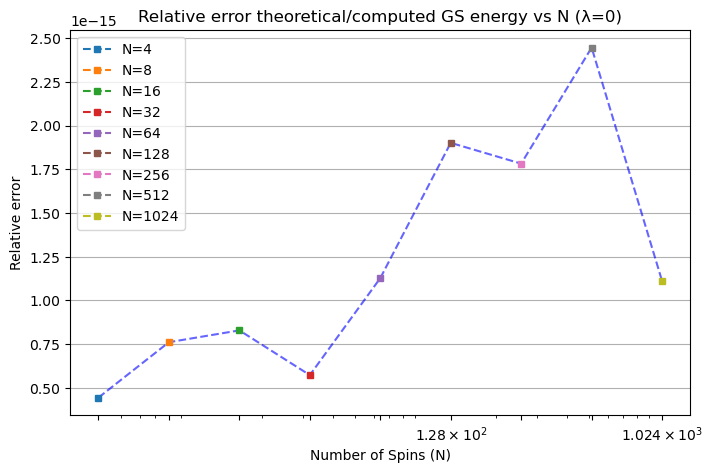

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(list(error_eigval.keys()),list(error_eigval.values()), "--", color = "blue", alpha = 0.6)

df.plot_dict_N_GSen(error_eigval, "plot")

plt.xscale('log')
plt.xticks(list(error_eigval.keys()))   
plt.xlabel('Number of Spins (N)')
plt.ylabel('Relative error')
plt.title(f'Relative error theoretical/computed GS energy vs N (λ=0)')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show()

Convergence achieved at iteration 15: ε = -1.0442635532408024 

Converged reached for a system with N = 65536 sites, with precision: delta = 1.136069941565232e-05


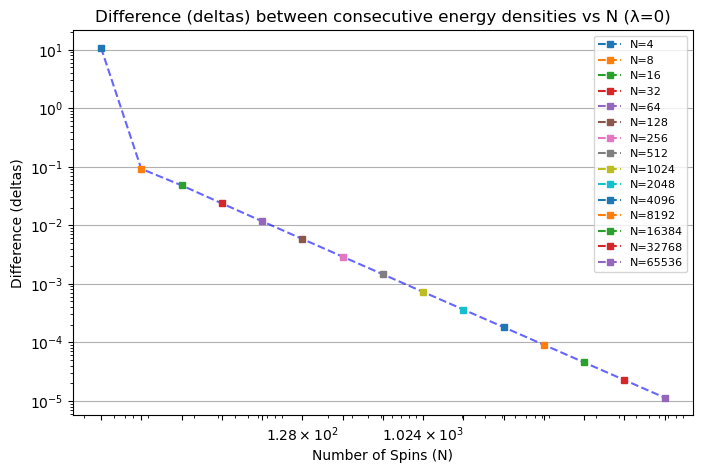

In [9]:
N = 2   # Initial number of sites
l = 0.5   # lambda value of the trasverse field
threshold = 0    # Threshold value for the RSRG algorithm
max_iter = 15       # Number of iterations of the algorithm; each completed iteration doubles the number of sites N -> 2N and cosequently 
                    # the dimension of the Hamiltonian H_2N (before the truncation) 2**N -> 2**2N
d_eff = 2**N    # Number of eigevalues to retrieve in order to build the projector

# I run the RSRG algorithm
normgs_eigval_dict, eigvec, deltas_dim, actual_dim = df.real_space_rg(N, l, threshold, d_eff, max_iter)


plt.figure(figsize=(8, 5))
plt.plot(list(deltas_dim.keys()),list(deltas_dim.values()), "--", color = "blue", alpha = 0.6)

df.plot_dict_N_GSen(deltas_dim, "plot")

plt.xscale('log')
plt.yscale('log')
plt.xticks(list(deltas_dim.keys())) 
plt.xlabel('Number of Spins (N)')
plt.ylabel('Difference (deltas)')
plt.title(f'Difference (deltas) between consecutive energy densities vs N (λ=0)')
plt.legend(loc='upper right', fontsize = 8)
plt.grid(axis='y')
plt.show()

In these graphs we have compared the computed values of the ground state energies provided by the algorithm with the theoretical expectation value with lambda = 0. The relative error has very low values.

### $\lambda = \infty$

We can perform the same reasoning comparing the results provided by the RSRG with the theoretical ground state energy in this regime, namely $E_g = - \lambda \cdot N$.

In [10]:
N = 2       # Initial number of sites
l = 1e5     # lambda value of the trasverse field
threshold = 0   # Threshold value for the RSRG algorithm
max_iter = 15       # Number of iterations of the algorithm; each completed iteration doubles the number of sites N -> 2N and cosequently 
                    # the dimension of the Hamiltonian H_2N (before the truncation) 2**N -> 2**2N
d_eff = 2**N    # Number of eigevalues to retrieve in order to build the projector

# I run the RSRG algorithm
normgs_eigval_dict, eigvec, deltas_dim, actual_dim = df.real_space_rg(N, l, threshold, d_eff, max_iter)

# normgs_eigval_dict: is the dictionary of the normalized eigenvalues for each dimension in the iteration
# eigvec: is the first eigenvector of the last hamiltonian
# deltas_dim: is the list of deltas for each dimension in the iteration
# actual_dim: is the final dimension reached


# I compute the Non-Normalized GS energies by multipling again for the current value of N
gs_eigval = {N: N * en for N, en in normgs_eigval_dict.items()}

# I compute the expected behaviour for the Non-Normalized GS energies, using the above-mentioned formula
theoretical_eigval = {N: -(l*N) for N in normgs_eigval_dict.keys()}

# I compute the relative error between the computed and expected values of the Non-Normalized GS energies
error_eigval = {N: np.abs((gs_eigval[N] - theoretical_eigval[N])/theoretical_eigval[N]) for N in normgs_eigval_dict.keys()}

Convergence achieved at iteration 5: ε = -100000.00000211917 

Converged reached for a system with N = 64 sites, with precision: delta = 0.0


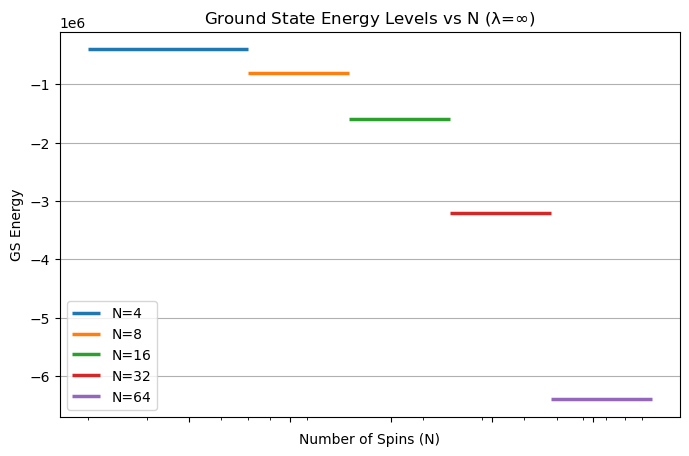

In [28]:
plt.figure(figsize=(8, 5))

df.plot_dict_N_GSen(gs_eigval, "hlines")

plt.xscale('log')
plt.xticks(list(gs_eigval.keys()))  
plt.xlabel('Number of Spins (N)')
plt.ylabel('GS Energy')
plt.title(f'Ground State Energy Levels vs N (λ=$\infty$)')
plt.legend(loc='lower left')
plt.grid(axis='y')
plt.show()

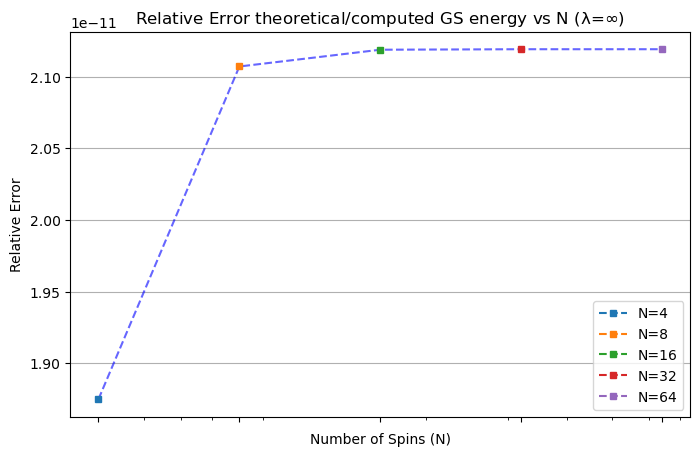

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(list(error_eigval.keys()),list(error_eigval.values()), "--", color = "blue", alpha = 0.6)

df.plot_dict_N_GSen(error_eigval, "plot")

plt.xscale('log')
plt.xticks(list(error_eigval.keys()))   
plt.xlabel('Number of Spins (N)')
plt.ylabel('Relative Error')
plt.title(f'Relative Error theoretical/computed GS energy vs N (λ=$\infty$)')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

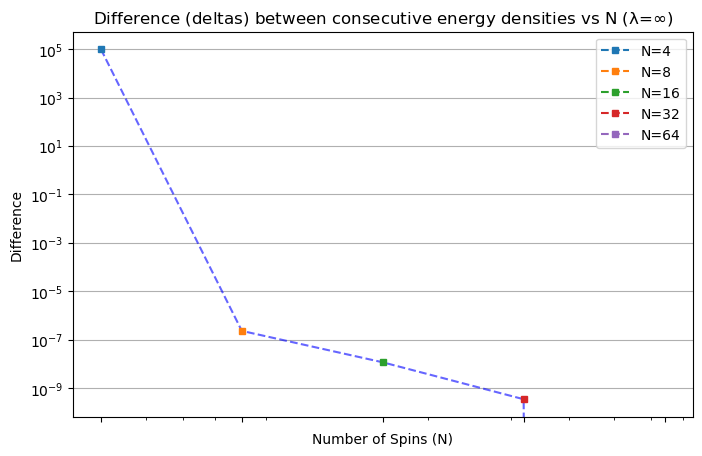

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(list(deltas_dim.keys()),list(deltas_dim.values()), "--", color = "blue", alpha = 0.6)

df.plot_dict_N_GSen(deltas_dim, "plot")

plt.xscale('log')
plt.yscale('log')
plt.xticks(list(deltas_dim.keys()))   
plt.xlabel('Number of Spins (N)')
plt.ylabel('Difference')
plt.title(f'Difference (deltas) between consecutive energy densities vs N (λ=$\infty$)')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

Ground State density energies versus the dimension N of the system. should be decreasing over N

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Convergence achieved at iteration 9: ε = -1.2597924697447596 

Converged reached for a system with N = 2048 sites, with precision: delta = 4.4602548232575145e-07


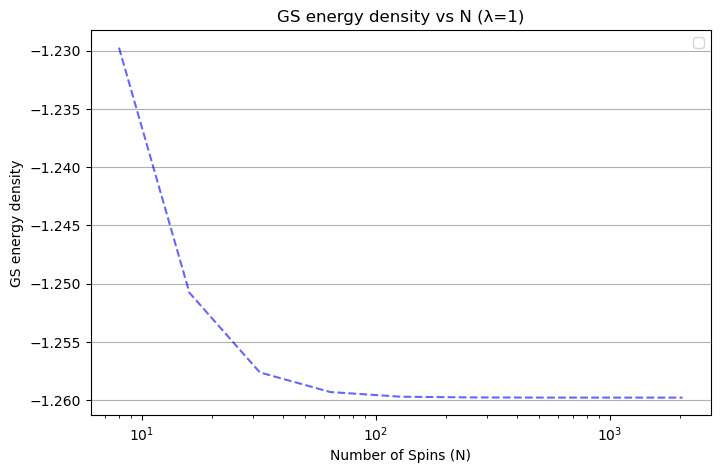

In [5]:
N = 4
l = 1
threshold = 1e-13
max_iter = 9
d_eff = 2**(N)

normgs_eigval_dict, eigvec, deltas_dim, actual_dim = df.real_space_rg(N, l, threshold, d_eff, max_iter)

plt.figure(figsize=(8, 5))
plt.plot(list(normgs_eigval_dict.keys()),list(normgs_eigval_dict.values()), "--", color = "blue", alpha = 0.6)


plt.xscale('log')
plt.xlabel('Number of Spins (N)')
plt.ylabel('GS energy density')
plt.title(f'GS energy density vs N (λ=1)')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

### Comparison RSRG with the Exact Diagonalization

I compare the results of the RSRG with the exact diagonalization technique varying $\lambda$. I can do that only for $N=4$ and $N=8$ due to allocation problems. In this way I'm able to see if the RSRG algortihm works properly.

In [8]:
N = 2
# l_values = np.linspace(0, -3, 20)
l_values = np.logspace(2, -2, 20)
threshold = 1e-3
max_iter = 2
actual_dim = N*(2**max_iter)

# With max_iter = 2, i build hamiltonians with dimensions N = 4 and N = 8

# RSRG ALGORITHM
eigval_dict, _ = df.update_hamiltonian(N, l_values, threshold, max_iter)

# eigval_dict: contains the normalized GS energy varying lambda, for N = 4 and N = 8

# I build the dictionaries splitting the case of N = 4 and N = 8
dict_4 = {key: subdict[4] for key, subdict in eigval_dict.items()}
dict_8 = {key: subdict[8] for key, subdict in eigval_dict.items()}

# Exact DIAGONALIZATION
exact_gs_energy, exact_gs = ex.diagonalize_ising(actual_dim, l_values, k=1)

# exact_gs_energy: contains the normalized GS energy varying lambda, for N = 4 and N = 8

# I build the dictionaries splitting the case of N = 4 and N = 8
dict_4_exact = {key[1]: value for key, value in exact_gs_energy.items() if key[0] == 4}
dict_8_exact = {key[1]: value for key, value in exact_gs_energy.items() if key[0] == 8}

Convergence achieved at iteration 2: ε = -100.00210824061641 

Converged reached for a system with N = 8 sites, with precision: delta = 0.00023323671025821113
Convergence achieved at iteration 2: ε = -61.588245580591106 

Converged reached for a system with N = 8 sites, with precision: delta = 0.00037987587963783653
Convergence achieved at iteration 2: ε = -37.93246555761042 

Converged reached for a system with N = 8 sites, with precision: delta = 0.0006198582644501016
Convergence achieved at iteration 2: ε = -23.36625693509345 

Converged reached for a system with N = 8 sites, with precision: delta = 0.0010144395385331961
Convergence achieved at iteration 2: ε = -14.39920300366372 

Converged reached for a system with N = 8 sites, with precision: delta = 0.0016679450244243554
Convergence achieved at iteration 2: ε = -8.882601576020228 

Converged reached for a system with N = 8 sites, with precision: delta = 0.002762360671662023
Convergence achieved at iteration 2: ε = -5.49461304109

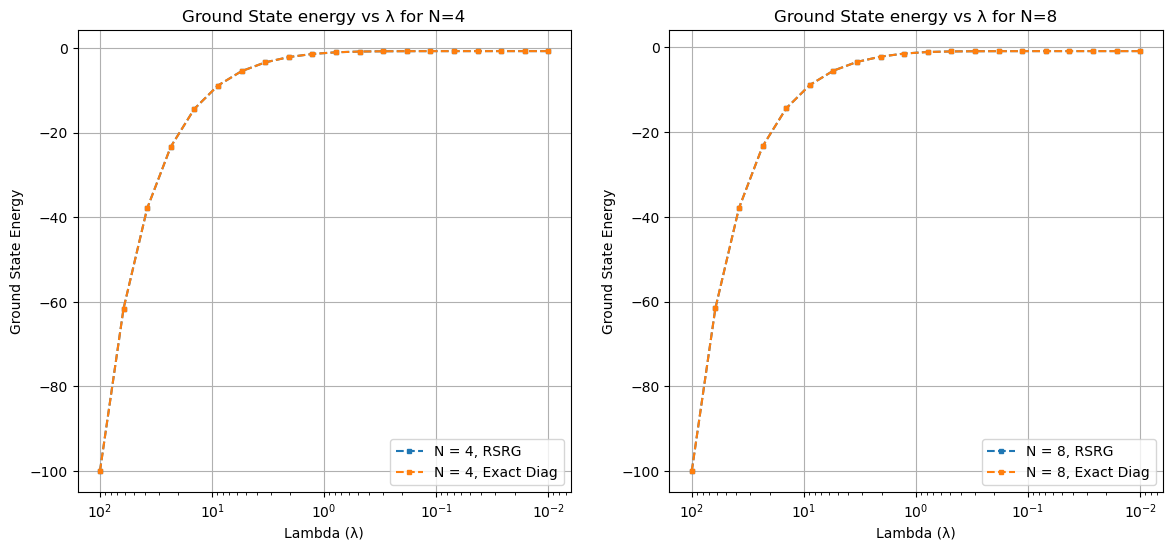

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(dict_4.keys(), dict_4.values(), "s--", markersize = 3, label=f'N = 4, RSRG')
ax1.plot(dict_4_exact.keys(), dict_4_exact.values(), "s--", markersize = 3, label=f'N = 4, Exact Diag')
ax1.invert_xaxis()
ax1.set_xscale('log')  
ax1.set_xlabel('Lambda (λ)')
ax1.set_ylabel('Ground State Energy')
ax1.set_title('Ground State energy vs λ for N=4')
ax1.legend()
ax1.grid(True)


ax2.plot(dict_8.keys(), dict_8.values(), "s--", markersize = 3, label=f'N = 8, RSRG')
ax2.plot(dict_8_exact.keys(), dict_8_exact.values(), "s--", markersize = 3, label=f'N = 8, Exact Diag')
ax2.invert_xaxis()
ax2.set_xscale('log')  
ax2.set_xlabel('Lambda (λ)')
ax2.set_ylabel('Ground State Energy')
ax2.set_title('Ground State energy vs λ for N=8')
ax2.legend()
ax2.grid(True)

plt.show()


The two algorithms provide curves which perfectly overlap

## Comparison: RSRG - meanfield

First I compute the magnetization at the termodynamic limit $N \rightarrow \infty$, varying $\lambda$.

In [10]:
N = 2
l_values = np.logspace(1, -1, 200)
threshold = 0
max_iter = 10
actual_dim = N*(2**max_iter)

mags = df.compute_magnetization(N, l_values, threshold, d_eff, max_iter)

Convergence achieved at iteration 10: ε = -10.021343245339018 

Converged reached for a system with N = 2048 sites, with precision: delta = 1.7763568394002505e-13
Convergence achieved at iteration 10: ε = -9.793088268073136 

Converged reached for a system with N = 2048 sites, with precision: delta = 1.7763568394002505e-13
Convergence achieved at iteration 10: ε = -9.570078310879113 

Converged reached for a system with N = 2048 sites, with precision: delta = 1.794120407794253e-13
Convergence achieved at iteration 10: ε = -9.352193953490428 

Converged reached for a system with N = 2048 sites, with precision: delta = 1.900701818158268e-13
Convergence achieved at iteration 10: ε = -9.139318521416847 

Converged reached for a system with N = 2048 sites, with precision: delta = 1.936228954946273e-13
Convergence achieved at iteration 10: ε = -8.931338023499551 

Converged reached for a system with N = 2048 sites, with precision: delta = 2.042810365310288e-13
Convergence achieved at iterati

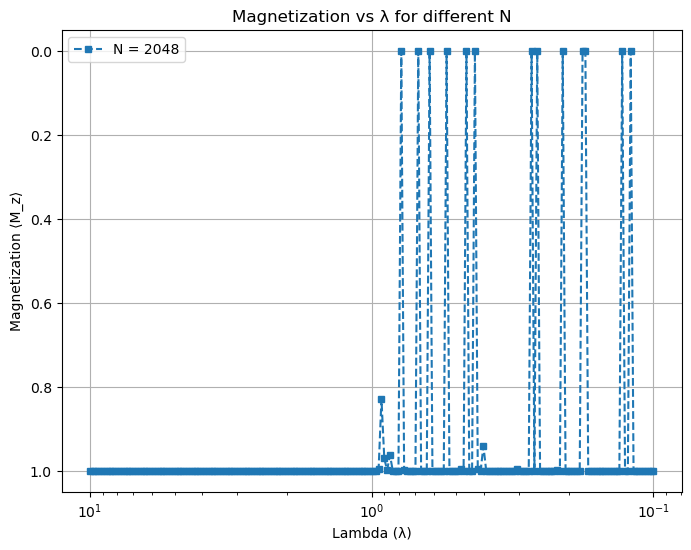

In [11]:
plt.figure(figsize=(8, 6))

plt.plot(l_values, mags, "s--", markersize = 4, label=f'N = {actual_dim}')

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xscale('log')  
plt.xlabel('Lambda (λ)')
plt.ylabel('Magnetization ⟨M_z⟩')
plt.title('Magnetization vs λ for different N')
plt.legend()
plt.grid(True)
plt.show()

Then I compute the ground state energy density at the termodynamic limit $N \rightarrow \infty$ as a function of $\lambda$. <br>
I expect to have the following behaviour 
$$
e =
\begin{cases} 
-1 - \frac{\lambda^2}{4} & \text{se } \lambda \in [-2, 2] \\
-|\lambda| & \text{se } \lambda \notin [-2, 2]
\end{cases}
$$

Convergence achieved at iteration 18: ε = -4.054000283118116 

Converged reached for a system with N = 524288 sites, with precision: delta = 0.0
Convergence achieved at iteration 19: ε = -3.8930844578934414 

Converged reached for a system with N = 1048576 sites, with precision: delta = 0.0
Convergence achieved at iteration 19: ε = -3.7323829869900975 

Converged reached for a system with N = 1048576 sites, with precision: delta = 0.0
Convergence achieved at iteration 18: ε = -3.5719267129873216 

Converged reached for a system with N = 524288 sites, with precision: delta = 0.0
Convergence achieved at iteration 18: ε = -3.411752718344319 

Converged reached for a system with N = 524288 sites, with precision: delta = 0.0
Convergence achieved at iteration 17: ε = -3.2519059948339257 

Converged reached for a system with N = 262144 sites, with precision: delta = 0.0
Convergence achieved at iteration 18: ε = -3.0924416819395137 

Converged reached for a system with N = 524288 sites, with p

/tmp/ipykernel_3523/3900504708.py:40: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(mf_fit, list(last_gs_energy_dict.keys()), list(last_gs_energy_dict.values()), p0=initial_guess)


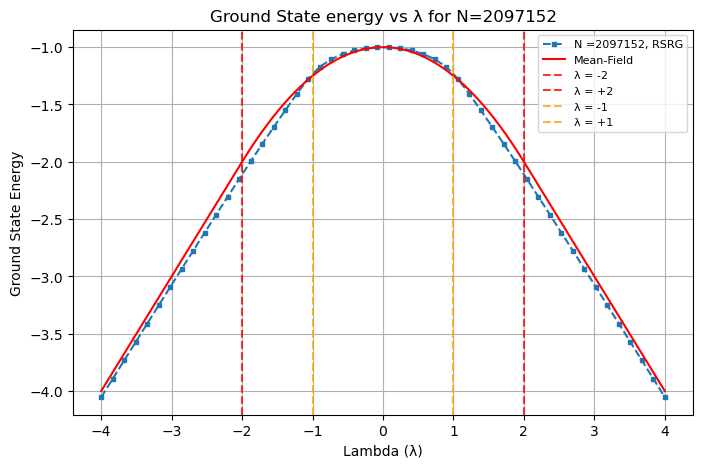

In [7]:
N = 2
l_extreme = 4

l_values = np.linspace(-l_extreme, l_extreme, 50)
threshold = 0
max_iter = 20       # Thermodynamic limit
actual_dim = N*(2**max_iter)

# RSRG  Algortihm
eigval_dict, _ = df.update_hamiltonian(N, l_values, threshold, max_iter)

# I build the dictionaries of the last GS density energies at different lambda
last_gs_energy_dict = {key: list(inner_dict.values())[-1] for key, inner_dict in eigval_dict.items()}

def mf(l_values):
    l_values = np.asarray(l_values)  
    e = np.where(
        (l_values >= -2) & (l_values <= 2),  
        - 1 - (l_values**2)/4,
        -np.abs(l_values)
    )
    return e


s_vals = np.linspace(-l_extreme, l_extreme, 100)
e = mf(s_vals)


# Fit
def mf_fit(l_values, A, B, C):
    l_values = np.asarray(l_values)  
    e = np.where(
        (l_values >= -C) & (l_values <= C),  
        - 1 - (l_values**2)*A,
        -np.abs(l_values)*B
    )
    return e

initial_guess = [0.25, 1, 2]
params, _ = curve_fit(mf_fit, list(last_gs_energy_dict.keys()), list(last_gs_energy_dict.values()), p0=initial_guess)
A = params[0]
B = params[1]    
C = params[2]

print(f"Fitted parameters:\n A = {A:.4f}, B = {B:.4f}, C = {C:.4f}")

fitted = mf_fit(s_vals, A, B, C)


plt.figure(figsize=(8, 5))

plt.plot(last_gs_energy_dict.keys(), last_gs_energy_dict.values(), "s--", markersize = 3, label=f'N ={actual_dim}, RSRG')
# plt.plot(s_vals, fitted, 'r--', label=f"Fitted curve; A = {A:.4f}, B = {B:.4f}, C = {C:.4f}")
plt.plot(s_vals, e, label="Mean-Field", color = "red")

plt.axvline(-2, color='red', linestyle='--',    alpha = 0.8, label='λ = -2')
plt.axvline(2, color='red', linestyle='--',     alpha = 0.8, label='λ = +2')
plt.axvline(-1, color='orange', linestyle='--', alpha = 0.8, label='λ = -1')
plt.axvline(1, color='orange', linestyle='--',  alpha = 0.8, label='λ = +1')
plt.xlabel('Lambda (λ)')
plt.ylabel('Ground State Energy')
plt.title(f'Ground State energy vs λ for N={actual_dim}')
plt.legend(fontsize =8)
plt.grid(True)